In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [5]:
#rdir = '/workspace'
rdir = '../'
dat_files = natsort(glob2.glob(rdir + '/results/B/**/*.dat'))
len(dat_files)
#dat_files

48

In [7]:
columns = ['areaintRock', 'tempintRock',  'rmsintRock', 'dwintRock', 'vdintRock',
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
                                  'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime']

In [8]:
data = []
realtime = []
gooddata = []
col = 'rmsintRock'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        realtime.append(df['realtime'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [13]:
params = []
counter = 1
faultType = []
fc=[]
viscFault = []
for a in ['None', 'Iso', 'Trans']:
    for b in [1., 2., 5., 10.]:
        for c in [0.5, 0.1, 0.05, 0.01]:
            faultType.append(a)
            fc.append(b)
            viscFault.append(c)
            params.append([counter, a, b, c])
            counter += 1

In [12]:
data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.mean())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [15]:
newdf['faultType'] = faultType
newdf['fc'] = fc
newdf['viscFault'] = viscFault

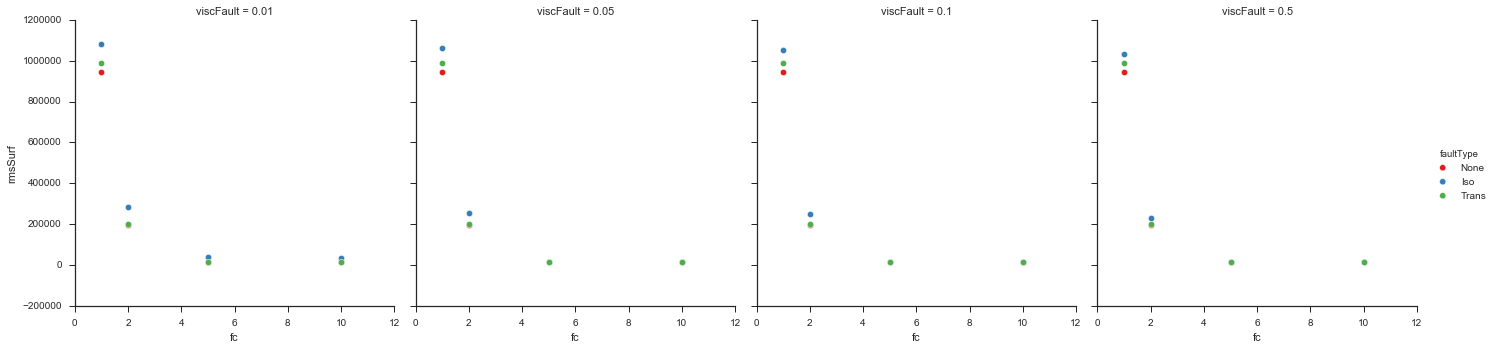

In [39]:
yaxis = 'rmsSurf' #'rmsSurf'#, 'nuTop' #
kws = dict(s=40, linewidth=.5, edgecolor="w")


# plot
sns.set_style('ticks')


g = sns.FacetGrid(newdf,col='viscFault', hue="faultType", palette="Set1", size=5)
g = g.map(plt.scatter, 'fc', yaxis,  **kws).add_legend()


#g.set(ylim=(1., 1e4))
#g.set(xlim=(0.002, 0.5))

#g.fig.get_axes()[0].set_yscale('log')
#g.fig.get_axes()[0].set_xscale('log')
#g.fig.get_axes()[1].set_yscale('log')
#g.fig.get_axes()[1].set_xscale('log')
#g.fig.get_axes()[2].set_yscale('log')
#g.fig.get_axes()[2].set_xscale('log')




plt.show()


In [21]:
params

[[1, 'None', 1.0, 0.5],
 [2, 'None', 1.0, 0.1],
 [3, 'None', 1.0, 0.05],
 [4, 'None', 1.0, 0.01],
 [5, 'None', 2.0, 0.5],
 [6, 'None', 2.0, 0.1],
 [7, 'None', 2.0, 0.05],
 [8, 'None', 2.0, 0.01],
 [9, 'None', 5.0, 0.5],
 [10, 'None', 5.0, 0.1],
 [11, 'None', 5.0, 0.05],
 [12, 'None', 5.0, 0.01],
 [13, 'None', 10.0, 0.5],
 [14, 'None', 10.0, 0.1],
 [15, 'None', 10.0, 0.05],
 [16, 'None', 10.0, 0.01],
 [17, 'Iso', 1.0, 0.5],
 [18, 'Iso', 1.0, 0.1],
 [19, 'Iso', 1.0, 0.05],
 [20, 'Iso', 1.0, 0.01],
 [21, 'Iso', 2.0, 0.5],
 [22, 'Iso', 2.0, 0.1],
 [23, 'Iso', 2.0, 0.05],
 [24, 'Iso', 2.0, 0.01],
 [25, 'Iso', 5.0, 0.5],
 [26, 'Iso', 5.0, 0.1],
 [27, 'Iso', 5.0, 0.05],
 [28, 'Iso', 5.0, 0.01],
 [29, 'Iso', 10.0, 0.5],
 [30, 'Iso', 10.0, 0.1],
 [31, 'Iso', 10.0, 0.05],
 [32, 'Iso', 10.0, 0.01],
 [33, 'Trans', 1.0, 0.5],
 [34, 'Trans', 1.0, 0.1],
 [35, 'Trans', 1.0, 0.05],
 [36, 'Trans', 1.0, 0.01],
 [37, 'Trans', 2.0, 0.5],
 [38, 'Trans', 2.0, 0.1],
 [39, 'Trans', 2.0, 0.05],
 [40, 'Trans', 2

In [25]:
sns.FacetGrid?